In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import plotly.express as px

plt.style.use('seaborn')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


# Remove Outliers and Null values

In [4]:
train.isnull().any().any()

False

In [5]:
#clip out extreme values
print(f'Initial number of data points: {train.shape[0]}')
lower_quantile, upper_quantile = train[['cont7','cont9']].quantile(0.01), train[['cont7','cont9']].quantile(0.99)
train = train[(train['cont7']>lower_quantile[0])&(train['cont7']<upper_quantile[0])&(train['cont9']>lower_quantile[1])&(train['cont9']<upper_quantile[1])]
train = train.reset_index()
print(f'Final number of data points: {train.shape[0]}')

Initial number of data points: 300000
Final number of data points: 288119


In [6]:
# split into id, features and target
train_id = train['id']
train_features = train[[col for col in train.columns if 'cont' in str(col)]]
train_target = train['target']

test_id = test['id']
test_features = test[[col for col in test.columns if 'cont' in str(col)]]

feature_names = [col for col in train.columns if 'cont' in str(col)]

# Base Model

In [7]:
def get_rmse(features,target,feature_names):
    x_train, x_val, y_train, y_val = train_test_split(features[feature_names],target,test_size=0.2,random_state=2021)
    lr = LinearRegression()
    model = lr.fit(x_train,y_train)
    predictions = model.predict(x_val)
    rmse = mean_squared_error(y_val,predictions,squared=False)
    print(f'The Root Mean Squared Error is {rmse:.5f}')

In [8]:
get_rmse(train_features,train_target,feature_names)

The Root Mean Squared Error is 0.72592


# Without cont6 due to high correlation

taking out cont6 does not help the model

In [9]:
without_cont6_feature_names = [feat for feat in feature_names if feat not in ('cont6')]
get_rmse(train_features,train_target,without_cont6_feature_names)

The Root Mean Squared Error is 0.72653


# Using Features with higher coefficients in LR model

Lower coefficients could mean that the feature is not as important and model is trying to reduce the noise. we could make this assumption as the features are scaled to the same mean and standard deviation, which could be seen from the describtive satatistics. By taking these features out, we might be removing noise and hopefully improve the model's performance. From the below plot, it is evident that cont5 and cont14 have lower coefficients, let's remove them and see how the model performs

Text(0.5, 1.0, 'Coefficients of linear regression')

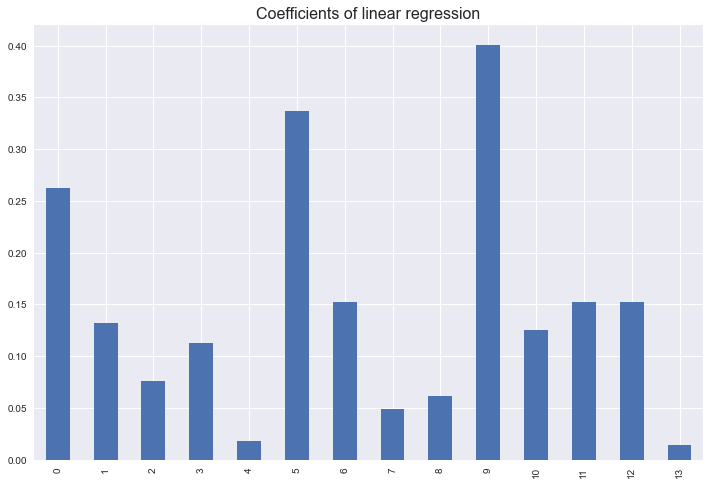

In [10]:
x_train, x_val, y_train, y_val = train_test_split(train_features[feature_names],train_target,test_size=0.2,random_state=2021)
lr = LinearRegression()
model = lr.fit(x_train,y_train)
fig = pd.DataFrame(abs(model.coef_)).plot(kind='bar',legend=False,figsize=(12,8))
fig.set_title('Coefficients of linear regression',fontsize=16)

In [11]:
high_coef_feature_names = [feat for feat in feature_names if feat not in ('cont5','cont14')]
get_rmse(train_features,train_target,high_coef_feature_names)

The Root Mean Squared Error is 0.72594


No help at all

# Sharp Peaks in Cont2 and Cont3

we could now focus our attention to the peaks in cont2 and cont3 and try to see if that helps our model

In [12]:
#fig =px.histogram(train,x='cont2',opacity=0.3,nbins=100)
#fig.update_layout(title='Cont2 Histogram Plot')
#fig.show()

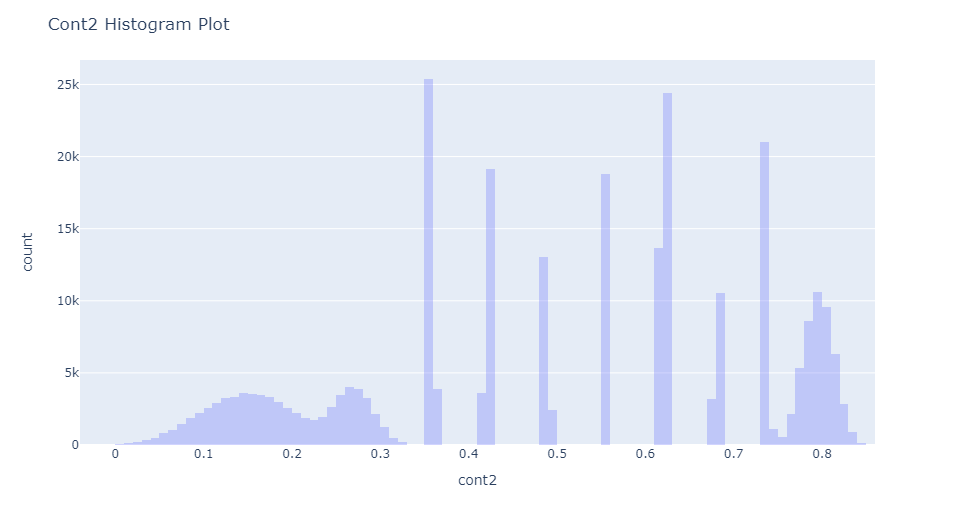

In [13]:
#fig =px.histogram(train,x='cont3',opacity=0.3,nbins=100,title='cont3 Histogram')
#fig.show()

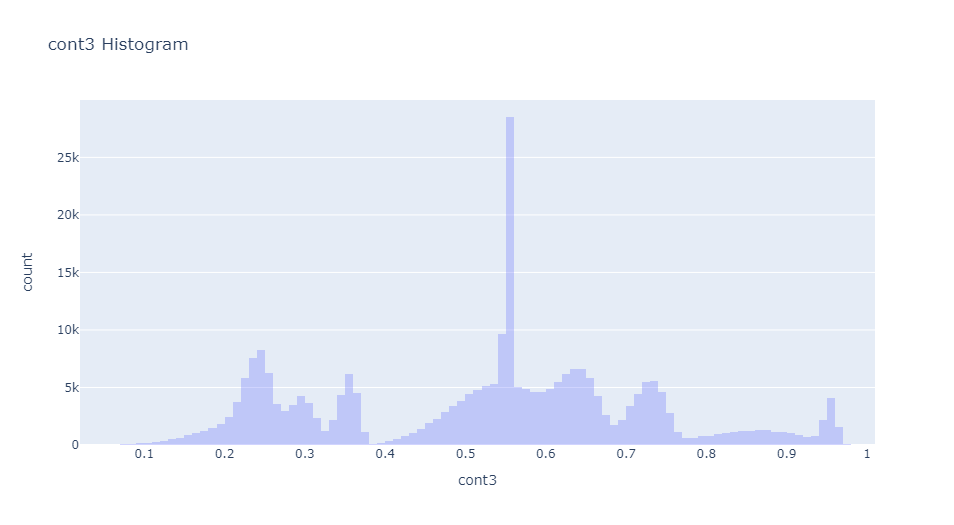

In [14]:
peak_train = train.copy()
feat = peak_train['cont2']
peak_train['cont2_int'] = np.where((feat<0.35),0,-1)
peak_train['cont2_int'] = np.where((feat>0.35)&(feat<0.37),1,peak_train['cont2_int'])
peak_train['cont2_int'] = np.where((feat>0.41)&(feat<0.43),2,peak_train['cont2_int'])
peak_train['cont2_int'] = np.where((feat>0.48)&(feat<0.50),3,peak_train['cont2_int'])
peak_train['cont2_int'] = np.where((feat>0.55)&(feat<0.56),4,peak_train['cont2_int'])
peak_train['cont2_int'] = np.where((feat>0.61)&(feat<0.63),5,peak_train['cont2_int'])
peak_train['cont2_int'] = np.where((feat>0.67)&(feat<0.69),6,peak_train['cont2_int'])
peak_train['cont2_int'] = np.where((feat>0.73)&(feat<0.75),7,peak_train['cont2_int'])
peak_train['cont2_int'] = np.where((feat>0.75),8,peak_train['cont2_int'])

In [15]:
peak_train['cont3_int'] = (peak_train['cont3']>0.54)&(peak_train['cont3']<0.56)

In [16]:
na_cont2_int = peak_train['cont2_int'].isna().any()
na_cont3_int = peak_train['cont3_int'].isna().any()
print(f'Na in cont2_int: {na_cont2_int}')
print(f'Na in cont3_int: {na_cont3_int}')

Na in cont2_int: False
Na in cont3_int: False


In [17]:
peak_feature_names = [col for col in peak_train.columns if 'cont' in str(col)]
get_rmse(train_features,train_target,high_coef_feature_names)

The Root Mean Squared Error is 0.72594


no improvement as well :(

# Log Transform

In [18]:
log_train_features = train_features.copy()
for col in feature_names:
    log_train_features[f'log_{col}'] = np.log(np.square(log_train_features[col])**(0.5)+0.01)

na_values_presence = log_train_features.isna().any().any()
print(f'Presence of any NA values: {na_values_presence}')

log_train_feature_names = [col for col in log_train_features.columns if 'cont' in str(col)]
get_rmse(log_train_features,train_target,log_train_feature_names)

Presence of any NA values: False
The Root Mean Squared Error is 0.72254


There are improvements in using a log features along side the orginial

# BOX-COX Transform

A Box Cox transformation is a transformation of non-normal dependent variables into a normal shape

In [19]:
from scipy.stats import boxcox

BC_train_features = train_features.copy()
for feat in feature_names:
    BC_train_features[f'bc_{feat}'],_ = boxcox(np.sqrt(BC_train_features[feat]**2))

BC_train_feature_names = [feat for feat in BC_train_features if 'cont' in str(feat)]
get_rmse(BC_train_features,train_target,BC_train_feature_names)

The Root Mean Squared Error is 0.72223


There are significant improvements in using a box cox features along side the orginial

# PCA

To reduce the dimension of your feature space ao that we have fewer relationships between variables to consider and are less likely to overfit our model. 

Principal component analysis is a technique for feature extraction — so it combines our input variables in a specific way, then we can drop the “least important” variables while still retaining the most valuable parts of all of the variables!

In [23]:
from sklearn.decomposition import PCA

pca_train_features = train_features.copy()
pca = PCA(n_components='mle')
pca_components = pd.DataFrame(pca.fit_transform(pca_train_features[feature_names]))
pca_components.columns = [f'pca_cont{i}' for i in range(pca_components.shape[1])]
pca_train_features = pd.concat([pca_train_features,pca_components],axis=1)

In [24]:
pca_train_features_names = [feat for feat in pca_train_features.columns if 'pca_cont' in str(feat)]
get_rmse(pca_train_features,train_target,pca_train_features_names)

The Root Mean Squared Error is 0.72658


NOPE not improving

# Combining BOX-COX and Log Transform

In [25]:
log_feature_names = [feat for feat in log_train_features.columns if 'log_cont' in str(feat)]
log_features = log_train_features[log_feature_names]

BC_feature_names = [feat for feat in BC_train_features.columns if 'bc_cont' in str(feat)]
BC_features = BC_train_features[BC_feature_names]

new_train_features = pd.concat([train_features,log_features,BC_features],axis=1)
new_train_features.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,...,bc_cont5,bc_cont6,bc_cont7,bc_cont8,bc_cont9,bc_cont10,bc_cont11,bc_cont12,bc_cont13,bc_cont14
0,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,...,-1.627804,-0.153681,-0.115569,-1.418084,-0.559096,-0.239063,-0.080440,-0.139456,-0.128049,-1.066188
1,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,...,-0.480786,-0.751483,-0.665763,-0.572981,-0.818871,-0.730296,-0.730866,-0.722043,-0.924849,-0.910200
2,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,...,-0.551883,-0.184632,-0.674803,-0.615988,-0.511805,-0.188209,-0.523199,-0.363685,-0.123363,-1.072438
3,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,...,-1.637502,-0.237457,-0.282941,-0.198174,-0.532711,-0.496592,-0.252202,-0.193822,-0.089027,-1.136891
4,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,...,-0.441414,-0.183514,-0.712420,-0.529258,-0.132635,-0.143284,-0.016522,-0.102942,-0.065905,-0.770578


In [26]:
new_train_features_names = new_train_features.columns
get_rmse(new_train_features,train_target,new_train_features_names)

The Root Mean Squared Error is 0.72005


Much imporvments!!! YAY XD